<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prepare Data</a></span><ul class="toc-item"><li><span><a href="#liver-Data" data-toc-modified-id="liver-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>liver Data</a></span></li><li><span><a href="#Plot-Data" data-toc-modified-id="Plot-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot Data</a></span></li><li><span><a href="#Plot-Kernels" data-toc-modified-id="Plot-Kernels-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Plot Kernels</a></span></li></ul></li><li><span><a href="#BEMKL" data-toc-modified-id="BEMKL-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>BEMKL</a></span><ul class="toc-item"><li><span><a href="#Non--Sparse" data-toc-modified-id="Non--Sparse-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Non- Sparse</a></span></li><li><span><a href="#Kernel-Sparse" data-toc-modified-id="Kernel-Sparse-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Kernel-Sparse</a></span></li><li><span><a href="#data-sparse" data-toc-modified-id="data-sparse-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>data-sparse</a></span></li><li><span><a href="#data-and-kernel-sparse" data-toc-modified-id="data-and-kernel-sparse-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>data and kernel sparse</a></span></li><li><span><a href="#Sparsity-Plots" data-toc-modified-id="Sparsity-Plots-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Sparsity Plots</a></span></li><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Cross Validation</a></span></li><li><span><a href="#Comparison-with-SVM" data-toc-modified-id="Comparison-with-SVM-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Comparison with SVM</a></span></li></ul></li></ul></div>

In [4]:
import pandas as pd

import scipy as sc
from scipy.io import loadmat

import numpy as np

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics.pairwise import polynomial_kernel

from matplotlib import pyplot as plt
%matplotlib inline

import time

import util

from util import *
import plot
import bemkl_binary


np.random.seed(123)

# Prepare Data

1. Features: 
   - kernel of all features
   - kernel of each feature
   - gaussian, polynomial 
2. Features preprocessing:
   - normalization of the features
   - spherical normalization of kernel matrices
3. Kernel Preprocessing


## liver Data

In [5]:
reload(util)


X_liver, y_liver  = util.get_liver_data()
X_liver = util.preprocess_feats(X_liver)

N = int(X_liver.shape[0]*.75)

K_liver = util.get_kernels(X_liver, poly=True, feat_kernel=True, gauss=True, max_gauss_width=3, min_gauss_width=-1)

K_liver = util.preprocess_kernel(K_liver)
K, K_test = K_liver[:,:N,:N],K_liver[:,N:,:N]
y, y_test = y_liver[:N], y_liver[N:]

P = K.shape[0]

print 'Number of Kernels:', P
print 'Data Points:', X_liver.shape[0]
print 'Training Points:', N

Number of Kernels: 88
Data Points: 583
Training Points: 437


## Plot Data

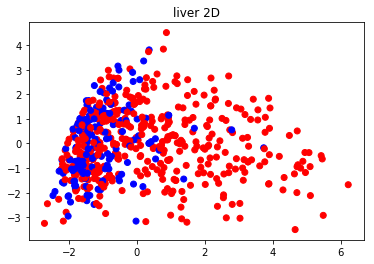

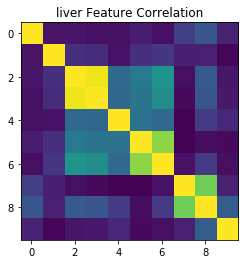

In [7]:
reload(plot)
plot.plot_data(X_liver,y_liver, 'liver')


## Plot Kernels

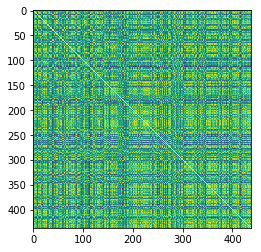

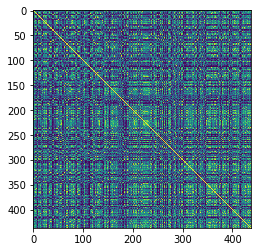

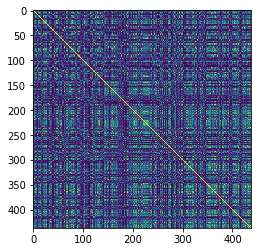

In [8]:
for i in range(3):
    plot.plot_kernel(K[i,...],'liver_k%d'%i)

# BEMKL


## Non- Sparse

In [9]:
reload(bemkl_binary)

nsp_clf = bemkl_binary.BEMKL(sparse=False)

t1 = time.time()

nsp_clf.bemkl_binary(K,y)

t2 = time.time()
diff = t2 - t1

pred, prob = nsp_clf.predict(K_test)

print 'Accuracy:'
print (pred==y_test).sum()*1./y_test.shape[0]
print 'Training Time:', diff

Accuracy:
0.7671232876712328
Training Time: 9.94167304039


In [10]:
nsp_clf.report_results()

Nmber of Chosen Kernels:
88
Nmber of Chosen Points:
280


## Kernel-Sparse

In [11]:
sp_clf = bemkl_binary.BEMKL(sparse=True)

t1 = time.time()

sp_clf.bemkl_binary(K,y)


t2 = time.time()
diff = t2 - t1

pred, prob = sp_clf.predict(K_test)

print 'Accuracy:'
print (pred==y_test).sum()*1./y_test.shape[0]
print 'Training Time:', diff

Accuracy:
0.7534246575342466
Training Time: 10.0940690041


In [12]:
sp_clf.report_results()

Nmber of Chosen Kernels:
12
Nmber of Chosen Points:
273


## data-sparse

In [13]:
dsp_clf = bemkl_binary.BEMKL(data_sparse=True)

t1 = time.time()

dsp_clf.bemkl_binary(K,y)


t2 = time.time()
diff = t2 - t1

pred, prob = dsp_clf.predict(K_test)

print 'Accuracy:'
print (pred==y_test).sum()*1./y_test.shape[0]
print 'Training Time:', diff

Accuracy:
0.7671232876712328
Training Time: 9.84703397751


In [14]:
dsp_clf.report_results()

Nmber of Chosen Kernels:
77
Nmber of Chosen Points:
72


## data and kernel sparse

In [ ]:
'''all_sp_clf = bemkl_binary.BEMKL(data_sparse=True, sparse=True)

t1 = time.time()

all_sp_clf.bemkl_binary(K,y)


t2 = time.time()
diff = t2 - t1

pred, prob = all_sp_clf.predict(K_test)

print 'Accuracy:'
print (pred==y_test).sum()*1./y_test.shape[0]
print 'Training Time:', diff'''

## Sparsity Plots

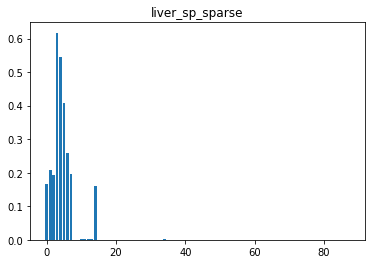

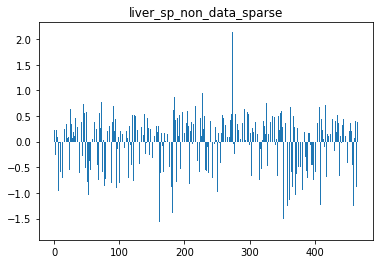

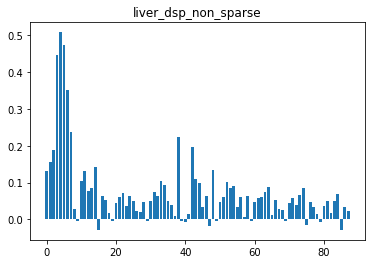

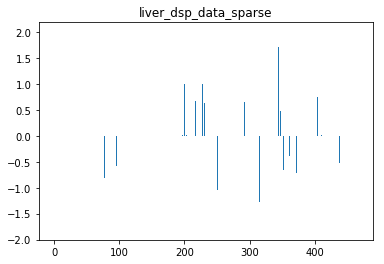

In [7]:
#plot.plot_results(nsp_clf, 'liver_nsp')
plot.plot_results(sp_clf, 'liver_sp')
plot.plot_results(dsp_clf, 'liver_dsp')
#plot.plot_results(all_sp_clf, 'liver_all_sp')


## Cross Validation

In [6]:
print 'Cross Validation Results for Non-Sparse model:'
nsp_clf = bemkl_binary.BEMKL(sparse=False)
nsp_clf.evaluate_model(K_liver,y_liver)

print 'Cross Validation Results for Kernel-Sparse model:'
sp_clf = bemkl_binary.BEMKL(sparse=True)
sp_clf.evaluate_model(K_liver,y_liver)

print 'Cross Validation Results for Data-Sparse model:'
dsp_clf = bemkl_binary.BEMKL(data_sparse=True)
dsp_clf.evaluate_model(K_liver,y_liver)

Cross Validation Results for Non-Sparse model:
Mean Accuracy: 0.7221338048924255
Cross Validation Results for Kernel-Sparse model:
Mean Accuracy: 0.7135131152372531
Cross Validation Results for Data-Sparse model:
Mean Accuracy: 0.7066460359563808


## Comparison with SVM

In [29]:
from sklearn import svm

# combined kernel using the non-sparse model weights
combined_K = np.sum([K_liver[i]*nsp_clf.mu_b_e[i+1] for i in range(K_liver.shape[0])], axis=0)
K_com, K_com_test = combined_K[:N,:N],combined_K[N:,:N]

clf = svm.SVC(kernel='precomputed')
clf.fit(K_com, y)

pred = clf.predict(K_com_test)

print 'Accuracy of SVM using combined kernel 1:'
print (pred==y_test).sum()*1./y_test.shape[0]

print 'Number of Support Vectors:'
print clf.support_.shape[0]


Accuracy of SVM using combined kernel 1:
0.85
Number of Support Vectors:
121


In [30]:
# combined kernel using the data-sparse model weights
combined_K = np.sum([K_liver[i]*dsp_clf.mu_b_e[i+1] for i in range(K_liver.shape[0])], axis=0)
K_com, K_com_test = combined_K[:N,:N],combined_K[N:,:N]

clf = svm.SVC(kernel='precomputed')
clf.fit(K_com, y)

pred = clf.predict(K_com_test)

print 'Accuracy of SVM using combined kernel 2:'
print (pred==y_test).sum()*1./y_test.shape[0]

print 'Number of Support Vectors:'
print clf.support_.shape[0]



Accuracy of SVM using combined kernel 2:
0.725
Number of Support Vectors:
59


In [32]:
# combined kernel using the kernel-sparse model weights
combined_K = np.sum([K_liver[i]*sp_clf.mu_b_e[i+1] for i in range(K_liver.shape[0])], axis=0)
K_com, K_com_test = combined_K[:N,:N],combined_K[N:,:N]

clf = svm.SVC(kernel='precomputed')
clf.fit(K_com, y)

pred = clf.predict(K_com_test)

print 'Accuracy of SVM using combined kernel 3:'
print (pred==y_test).sum()*1./y_test.shape[0]

print 'Number of Support Vectors:'
print clf.support_.shape[0]



Accuracy of SVM using combined kernel 3:
0.825
Number of Support Vectors:
141
